## Outline

1. Importing modules
2. Logistic Regression
    * 2.1. Problem Statement
    * 2.2. Loading and visualizing the data
    * 2.3. Sigmoid function
    * 2.4. Cost function for logistic regression
    * 2.5. Gradient for logistic regression
    * 2.6. Learning parameters using gradient descent
    * 2.7. Plotting the decision boundary
    * 2.8. Evaluating logistic regression
3. Regularized Logistic Regression
    * 3.1. Problem Statement
    * 3.2. Loading and visualizing the data
    * 3.3. Feature mapping
    * 3.4. Cost function for regularized logistic regression
    * 3.5. Gradient for regularized logistic regression
    * 3.6. Learning parameters using gradient descent
    * 3.7. Plotting the decision boundary
    * 3.8. Evaluating regularized logistic regression model

## 1. Importing modules

In [1]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## 2 - Logistic Regression

***

In this part of the exercise, we will build a logistic regression model to predict whether a student gets admitted into a university.

### 2.1 Problem Statement

Suppose that we are the administration office of a university department and we want to determine each applicant’s chance of admission based on their results on two exams.

* We have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, we have the applicant’s scores on two exams and the admissions decision.
* Our task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

### 2.2 Loading and visualizing the data

We will start by loading the dataset for this task.

The load_dataset() function shown below loads the data into variables X_train and y_train

* X_train contains exam scores on two exams for a student
* y_train is the admission decision
    * y_train = 1 if the student was admitted
    * y_train = 0 if the student was not admitted
* Both X_train and y_train are numpy arrays.

In [2]:
## load dataset
# Define a function "load_data" to load data from file
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [3]:
# test the function to import data from a file
X_train, y_train = load_data("./ex2data1.txt")

**View the variables** 


Let's get more familiar with a dataset.
* A good place to start is to just print out each variable and see what it contains.

In [4]:
# The code below prints the first five values of **X_train** and the type of the variable.
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [5]:
# Now print the first five values of y_train
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


**Check the dimensions of our variables**

Another useful way to get familiar with a data is to view its dimensions.

In [6]:
# Let's print the shape of X_train and y_train and see how many training examples we have in our dataset
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


**Visualize our data**

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

* The code below displays the data on a 2D plot, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

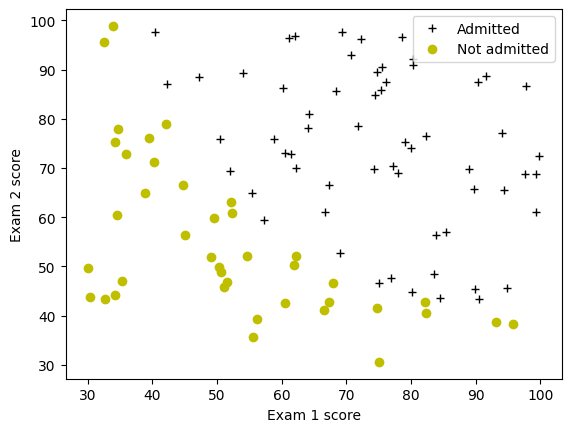

In [7]:
## Visualize the data

# Define a function "plot_data()" to plot a data
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

# test the function to plot our examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Our goal is to build a logistic regression model to fit this data.
* With this model, we can then predict if a new student will be admitted based on their scores on the two exams

### 2.3. Sigmoid function

***

Recall that for logistic regression, the model is represented as
$$ f_w,_b(x) = g(w * x + b) $$

where function **𝑔** is the sigmoid function. The sigmoid function is defined as:
$$ g(z) = \frac{1}{1 + e^{-z}} $$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.



### Exercise 1 

Calculate the "sigmoid" function with the following formula:
$$ g(z) = \frac{1}{1 + e^{-z}} $$

Note that
* z is not always a single number, but can also be an array of numbers.
* If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.




In [8]:
# Define a function "sigmoid()" to calculate
def sigmoid(z):
    #  """
    # Compute the sigmoid of z

    # Args:
    #     z (ndarray): A scalar, numpy array of any size.

    # Returns:
    #     g (ndarray): sigmoid(z), with the same shape as z
         
    # """
    g = 1/(1 + np.exp(-z))

    return g

When we are finished, try testing a few values by calling sigmoid(x) in the cell below.

* For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0.
* Evaluating sigmoid(0) should give you exactly 0.5.

Note: We can update this value any time

In [9]:
# test the sigmoid function with simple number that was previous defined 
value = 0
print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


Note: As was mentioned before, our code should also work with vectors and matrices. For a matrix, our function should perform the sigmoid function on every element.

In [10]:
# test the sigmoid function with more relevant numbers 
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


### 2.4 Cost function for logistic regression

***

In this section, we will implement the cost function for logistic regression.

### Exercise 2 

Calculate the "sigmoid" function with the following formula:
$$ g(z) = \frac{1}{1 + e^{-z}} $$

Let's complete the "compute_cost" function using the equations below.
Recall that for logistic regression, the cost function is of the form
$$ J(w, b) = \frac{1}{m} * \sum_{i=0}^{m-1} [loss(f_w,_b(x^i,y^i))] $$
(1)

where
* m is the number of training examples in the dataset
$$ loss(f_w,_b(x^i,y^i)) $$ 
is the cost for a single data point, which is - 

$$ loss(f_w,_b(x^i,y^i)) = (-y^i*log(f_w,_b(x^i)) - (1-y^i)*log(f_w,_b(x^i)) $$
(2)

$$ f_w,_b(x^i) $$
is the model's prediction, while 𝑦(𝑖), which is the actual label
$$ f_w,_b(x^i) = g(w * x^i + b) $$
where function 𝑔 is the sigmoid function.

* It might be helpful to first calculate an intermediate variable
$$ z_w,_b(x^i) = w * x^i + b = w_0 * x_0^i + ... + w_{n-1} * x_{n-1^i} + b $$
where **n** is the number of features, before calculating
$$ f_w,_b(x^i) = g(z_w,_b(x^i)) $$

Note:

* As we are doing this, remember that the variables **X_train** and **y_train** are not scalar values but matrices of shape (𝑚,𝑛) and (𝑚,1) respectively, where **𝑛** is the number of features and **𝑚** is the number of training examples.
* We can use the sigmoid function that you implemented above for this part.

In [11]:
## Define a cost fiction "compute_cost" to calculate costs for our logistic function
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    loss_sum = 0
    
    # Loop over each training example
    for i in range(m):
        
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0
    
        # Loop over each feature
        for j in range(n):
           
        # Add the corresponding term to z_wb
            z_wb_ij = w[j] * X[i][j] # code to calculate w[j] * X[i][j]
            z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
        
        # Add the bias term to z_wb
        z_wb += b
        
        # calculate prediction f_wb for a training example
        f_wb = sigmoid(z_wb)
        
        loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb) # code here to calculate loss for a training example
        
        
        loss_sum += loss # equivalent to loss_sum = loss_sum + loss
        
        
    total_cost = (1 / m) * loss_sum
  
    
    return total_cost 

In [12]:
# Run the cells below to check our implementation of the "compute_cost" function with two different initializations of the parameters 𝑤
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [13]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.218


### 2.5 Gradient for logistic regression

***

In this section, we will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

repeat until convergence: {
$$ b:= b - \alpha * \frac{\delta(J(w,b))}{\delta(b)} $$

$$ w_j:= w_j - \alpha * \frac{\delta(J(w,b))}{\delta(w_j)} $$
(1)

}

where, parameters **b, w[j]** are all updated simultaneously

### Exercise 3

Construct the "compute_gradient" function to compute from equations (2) and (3) below:

$$ \frac{\delta(J(w,b))}{\delta(b)} = \frac{1}{m} * \sum_{i=0}^{m-1} * (f_w,_b(x^i)-y^i) $$

$$ \frac{\delta(J(w,b))}{\delta(w_j)} = \frac{1}{m} * \sum_{i=0}^{m-1} * (f_w,_b(x^i)-y^i) * x_j^i $$



* **m** is the number of training examples in the dataset

* f_w,b(x^(i)) is the model's prediction, while y^(i)

* Note: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of f_w,_b(x)


In [14]:
# As before, we can use the sigmoid function that we implemented above.
def compute_gradient(X, y, w, b, lambda_=None):
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb_ij = w[j] * X[i, j]
            z_wb += z_wb_ij
            
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = (f_wb - y[i])
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i]) * X[i, j]
            dj_dw[j] += dj_dw_ij

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [15]:
# Run the cells below to check our implementation of the "compute_gradient" function with two different initializations of the parameters **𝑤**
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)

print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [16]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]


### 2.6 Learning parameters using gradient descent

***

Similar to the previous assignment, we will now find the optimal parameters of a logistic regression model by using gradient descent.

* We don't need to implement anything for this part. Simply run the cells below.
* A good way to verify that gradient descent is working correctly is to look at the value of 𝐽(𝐰,𝑏) and check that it is decreasing with each step.
* Assuming we have implemented the gradient and computed the cost correctly, our value of 𝐽(𝐰,𝑏) should never increase, and should converge to a steady value by the end of the algorithm.


In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note** 

The code block below takes a couple of minutes to run, especially with a non-vectorized version. We can reduce the iterations to test your implementation and iterate faster. If we have time later, try running 100,000 iterations for better results.

In [18]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


### 2.7 Plotting the decision boundary

***

We will now use the final parameters from gradient descent to plot the linear fit.

In [19]:
# Firstly implement function for feature engineering modeling (polynomial regression) 
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


# Finally, we have to define a function "plot_decision_boundary" to plot the data
def plot_decision_boundary(w, b, X, y):

    def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
        positive = y == 1
        negative = y == 0
    
        # Plot examples
        plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
        plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

    # test the "plot_data" function to plot our examples
    plot_data(X[:, 0:2], y, pos_label="Admitted", neg_label="Not admitted")

    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")


    # Set the y-axis label
    plt.ylabel('Exam 2 score') 
    # Set the x-axis label
    plt.xlabel('Exam 1 score') 
    plt.legend(loc="upper right")
    plt.show()

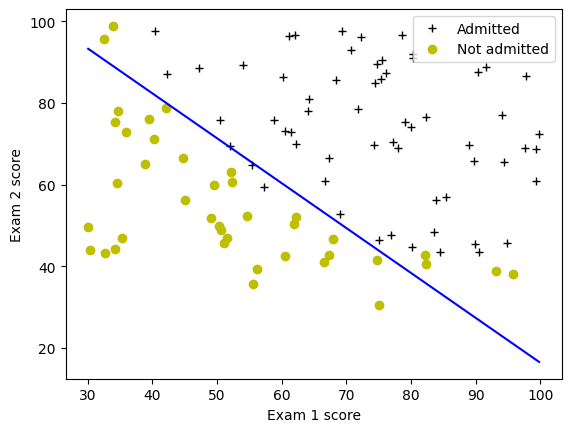

In [20]:
# Test a "plot decision boundary" function to make a plot
plot_decision_boundary(w, b, X_train, y_train)

### 2.8 Evaluating logistic regression

***

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set.

We will implement the "predict" function below to do this.

### Exercise 4

Let's complete the "predict" function to produce: **1** ot **0** predictions given a dataset and a learned parameter vector **𝑤** and **𝑏**

* First you need to compute the prediction from the model below for every example
$$ f(x^i) = g(w * x^i +b) $$

        * We have implemented this before in the parts above

* We interpret the output of the model f(x[i]) as the probabilty that y[i] = 1 given x[i] and parameterized by **w**

* Therefore, to get a final prediction (y[i] = or y[i] = 1) from the logistic regression model, you can use the following heuristic - suppose if

    $$ f(x^i) >= 0.5, predict =>  y^i = 1 $$
    
    $$ f(x^i) < 0.5, predict  =>  y^i = 0 $$

In [21]:
# Define a "predict" function
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

In [22]:
# Once we have completed the function "predict", let's run the code below to report the training accuracy of your classifier by computing the percentage of examples it got correct.
# Test our predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


In [23]:
# Now let's use this to compute the accuracy on the training set
# Compute accuracy on our training set
p = predict(X_train, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


## 3. Regularized Logistic Regression

***

In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). 
During QA, each microchip goes through various tests to ensure it is functioning correctly.

### 3.1. Problem Statement

Suppose we are the product manager of the factory and you have the test results for some microchips on two different tests.

* From these two tests, we would like to determine whether the microchips should be accepted or rejected.
* To help make the decision, we have a dataset of test results on past microchips, from which we can build a logistic regression model.

### 3.2. Loading and visualizing the data

Similar to previous parts of this exercise, let's start by loading the dataset for this task and visualizing it.

* The load_dataset() function shown below loads the data into variables **X_train** and **y_train**

    * X_train contains the test results for the microchips from two tests
    * y_train contains the results of the QA
        * y_train = 1 if the microchip was accepted
        * y_train = 0 if the microchip was rejected
    * Both X_train and y_train are numpy arrays

In [24]:
# load dataset
X_train, y_train = load_data("./ex2data2.txt")

**View the variables**

The code below prints the first five values of **X_train** and **y_train** and the type of the variables.

In [25]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


**Check the dimensions of your variables**

Another useful way to get familiar with our data is to view its dimensions. Let's print the shape of **X_train** and **y_train** and see how many training examples we have in our dataset

In [26]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


**Visualize our data**

The function "plot_data" is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

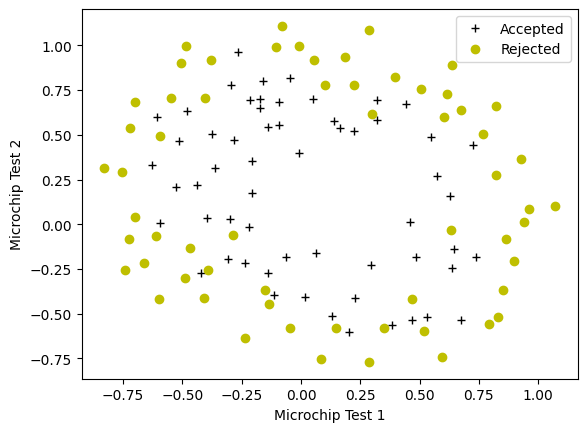

In [27]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

The figure above shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. 

Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


### 3.3 Feature mapping

***

One way to fit the data better is to create more features from each data point. In the provided function 'map_feature', we will map the features into all polynomial terms of $𝑥_1$ and $𝑥_2$ up to the sixth power.


$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$


As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.
* A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.
* We have provided the "map_feature" function to do so.


In [28]:
# Print out the origin and modified dimentions
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [29]:
# Let's also print the first elements of **X_train** and **mapped_X** to see the tranformation.
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. 
In the next parts of the exercise, we will implement regularized logistic regression to fit the data and also see for ourself how regularization can help combat the overfitting problem.


### 3.4. Cost function for regularized logistic regression

***

In this part, we will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form

$$ J(w,b) = \frac{1}{m} * \sum_{i=0}^{m-1} * [-y^i * log(f_w,_b(x^i)) - (1 - y^i) * log(1 - f_w,_b(x^i))] + \frac{\lambda}{2m} * \sum_{i=0}^{m-1} * w_j^2 $$

Compare it to the cost function without regularization (which we implemented above), which is of the form

$$ J(w,b) = \frac{1}{m} * \sum_{i=0}^{m-1} * [-y^i * log(f_w,_b(x^i)) - (1 - y^i) * log(1 - f_w,_b(x^i))] $$

The difference is the regularization term, which is

$$ \frac{\lambda}{2m} * \sum_{i=0}^{m-1} * w_j^2 $$

Note that the **𝑏** parameter is not regularized.

### Exercise 5


Please complete the "compute_cost_reg" function below to calculate the following term for each element in **𝑤**

$$ \frac{\lambda}{2m} * \sum_{i=0}^{m-1} * w_j^2 $$

The starter code then adds this to the cost without regularization (which we computed above in "compute_cost") to calculate the cost with regulatization.


In [30]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # We need to calculate this value
    reg_cost = 0.
    
    for j in range(n):
        reg_cost += (w[j]**2)
           
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [31]:
# Run the cell below to check your implementation of the "compute_cost_reg" function.
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost : {:.4f}".format(cost))

Regularized cost : 0.6618


### 3.5 Gradient for regularized logistic regression

***

In this section, we will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$ \frac{\delta(J(w,b))}{\delta(w)} = [\frac{1}{m} * \sum_{i=0}^{m-1} * (f_w,b(x^i)-y^i) * x_j^i] + \frac{\lambda}{m}*w_j $$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As we can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is 

$$ \frac{\lambda}{m}*w_j $$

### Exercise 6

Let's complete the "compute_gradient_reg" function below to modify the code below to calculate the following term

$$ \frac{\lambda}{m}*w_j $$
for j = 0...(n-1)

The starter code will add this term to the $\frac{\partial J(\mathbf{w},b)}{\partial w}$ returned from "compute_gradient" above to get the gradient for the regularized cost function.

In [32]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    # Loop over the elements of w
    for j in range(n):
        
        dj_dw_j_reg = (lambda_ / m) * w[j]  # code to calculate the regularization term for dj_dw[j]
        
        # Add the regularization term  to the correspoding element of dj_dw
        dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
    return dj_db, dj_dw

In [33]:
# Run the cell below to check your implementation of the "compute_gradient_reg" function.
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280124, 0.0536273463274574, 0.003140278267313462]


### 3.6 Learning parameters using gradient descent

***

Similar to the previous parts, we will use gradient descent function implemented above to learn the optimal parameters **𝑤**, **𝑏**.
* If we have completed the cost and gradient for regularized logistic regression correctly, we should be able to step through the next cell to learn the parameters **𝑤**.
* After training our parameters, we will use it to plot the decision boundary.

Note:
The code block below takes quite a while to run, especially with a non-vectorized version. We can reduce the iterations to test our implementation and iterate faster.

In [35]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


### 3.7 Plotting the decision boundary

***

To help visualize the model learned by this classifier, we will use our "plot_decision_boundary" function which plots the (non-linear) decision boundary that separates the positive and negative examples.

* In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.
* After learning the parameters **𝑤**, **𝑏**, the next step is to plot a decision boundary to the graph.

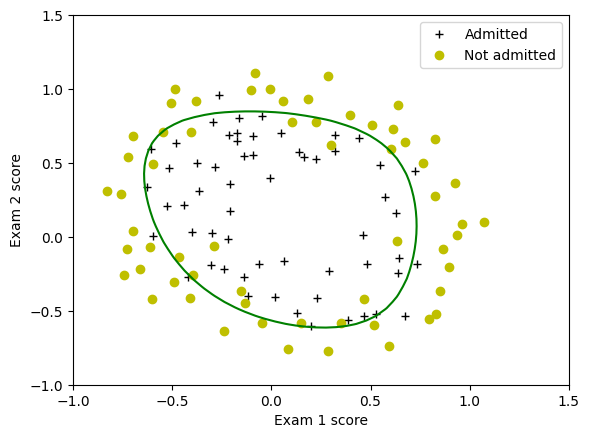

In [36]:
plot_decision_boundary(w, b, X_mapped, y_train)

### 3.8 Evaluating regularized logistic regression model

***

We will use the predict function that we implemented above to calculate the accuracy of the regulaized logistic regression model on the training set.

In [37]:
# Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
